# Efficient Frontier

In [2]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk

ind = pd.read_csv("ind30_m_vw_rets.csv", header = 0, index_col = 0, parse_dates = True)/100
ind.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [3]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
ind.index = pd.to_datetime(ind.index, format= "%Y%m").to_period('M')
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [5]:
ind.columns

# Some column names have imbedded spaces in the names

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
# To apply a string transformation that will remove the excess spaces

ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [7]:
ind.shape

(1110, 30)

In [8]:
ind = erk.get_ind_returns()
ind.shape


(1110, 30)

In [9]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<AxesSubplot:>

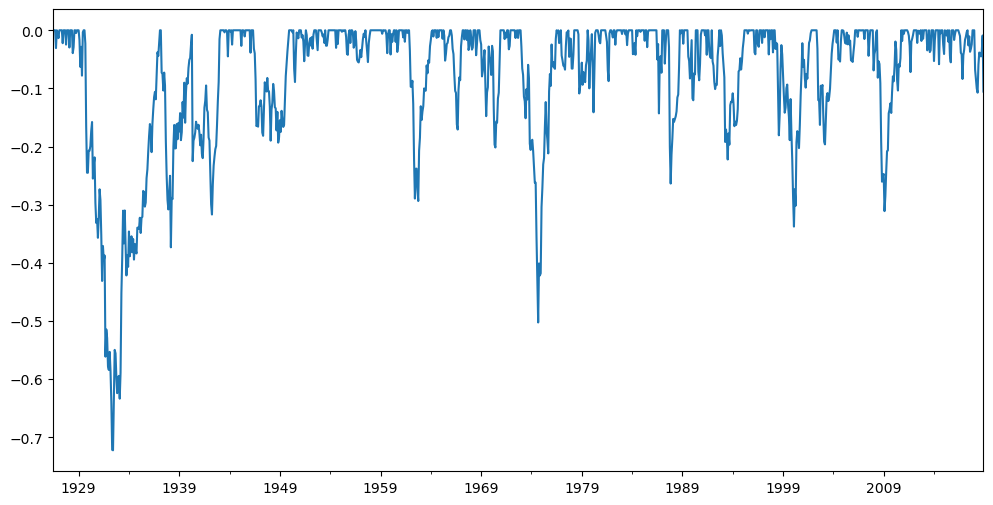

In [10]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [11]:
erk.var_gaussian(ind[["Food", "Smoke", "Coal", "Beer", "Fin"]], modified=True)


#OR

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [12]:
# This. ['food','smoke'...] is a list. That is why the first method has double brackets
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [13]:
# .tail() gives you last 5 values... These are the 5 HIGHEST VaR 
erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [14]:
# .head() gives you last 5 values... These are the 5 LOWEST VaR 
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:>

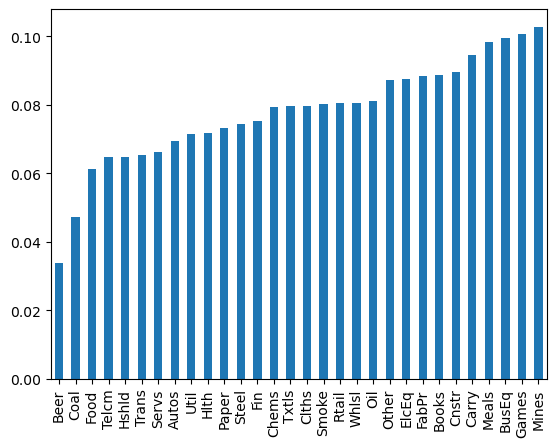

In [15]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar()

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

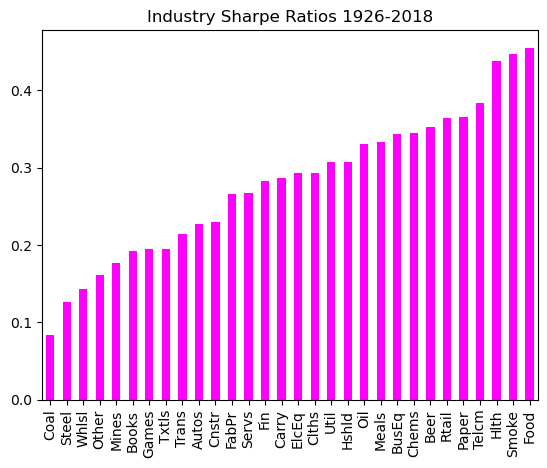

In [16]:
# 0.03 = risk free rate,
# 12 = periods per year

erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 1926-2018", color = "magenta")

<AxesSubplot:title={'center':'Industry Sharpe Ratios 2000-2018'}>

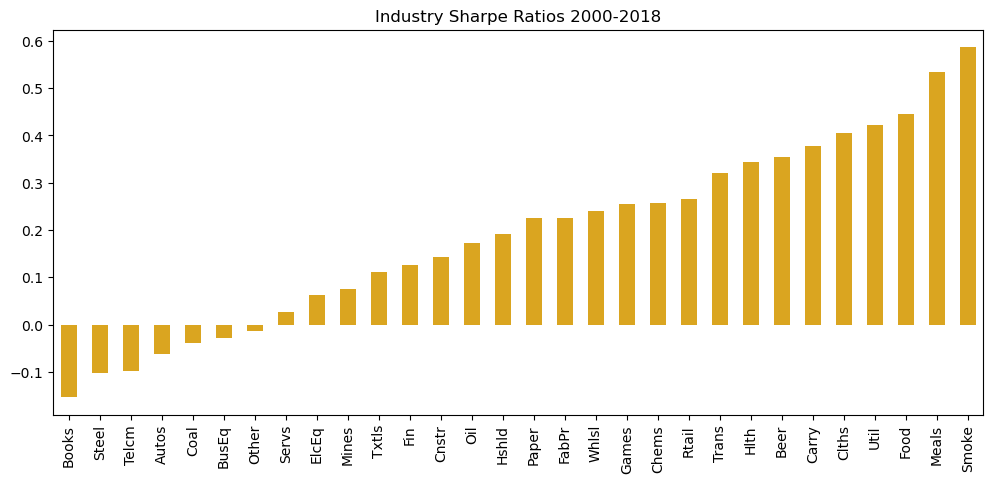

In [17]:
# To do the same thing from 2000-2018:

erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 2000-2018", figsize = (12,5), color = "goldenrod")

In [18]:
# Negative sharpe ratio means the industry portfolio has returned BELOW the risk free rate

# Computing Efficient Frontier

- In-sample exercise -- lets see what the efficient frontier WAS

In [19]:
er = erk.annualize_rets(ind["1996":"2000"], 12)

In [20]:
er.sort_values()

Mines   -0.053554
Txtls   -0.042721
Other    0.043349
Meals    0.067400
Games    0.068212
Trans    0.071099
Chems    0.077456
Clths    0.079160
Autos    0.080954
Cnstr    0.084076
Paper    0.097163
Smoke    0.107830
FabPr    0.108280
Steel    0.115809
Food     0.116799
Telcm    0.122771
Whlsl    0.126431
Hshld    0.134766
Beer     0.141126
Util     0.145903
Oil      0.165377
Carry    0.173904
Servs    0.175264
Books    0.187286
Rtail    0.207247
Fin      0.223371
Hlth     0.246641
BusEq    0.271952
ElcEq    0.272420
Coal     0.414689
dtype: float64

<AxesSubplot:>

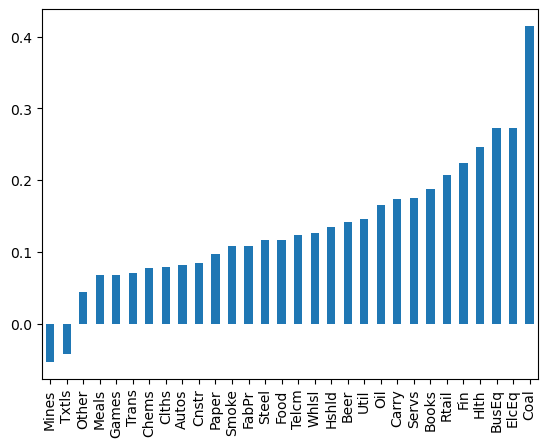

In [21]:
er.sort_values().plot.bar()

In [22]:
# generating covariance matrix

cov = ind["1996":"2000"].cov()
cov.shape

(30, 30)

In [23]:
# This is the covariance matrix. Diagnally symmetric

cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


Lab 2

we have: 
          Covariance matrix and Expected Return
    
  Now we can start generating portfolios and plotting them
 
    

Step 1: Generate the x and y axis points for each weight

In [24]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns  # ---> Matrix Notation for the returns (weightedAVG)

def portfolio_vol(weights, covmat): #---> Given weights and covariance matrix, we can get portfolio volatility
    """
    Weights --> Volatility
    """
    return (weights.T @ covmat @ weights)**0.5 # ---> Matrix Notation for the Variance of the portfolio

In [25]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [26]:
# .loc(row index, column index)

cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [27]:
# To set weights

weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [28]:
# Return metric

erk.portfolio_return(weights, er[l])

0.19511097196038385

In [29]:
# Risk metric

erk.portfolio_vol(weights, cov.loc[l, l])

0.05505919577643704

# 2 Asset Frontier

In [30]:
# Select portfolio assets you want to use

l = ["Games", "Fin"]

In [31]:
# Using a list comprehension in weights

n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0, 1, n_points)] # Put x% in 1 asset, must put 1-x% in the other asset
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [32]:
len(weights)

20

In [33]:
# Now we have to find the return and volatility that corresponds to each of those points

In [34]:
l

['Games', 'Fin']

<AxesSubplot:xlabel='Vol', ylabel='R'>

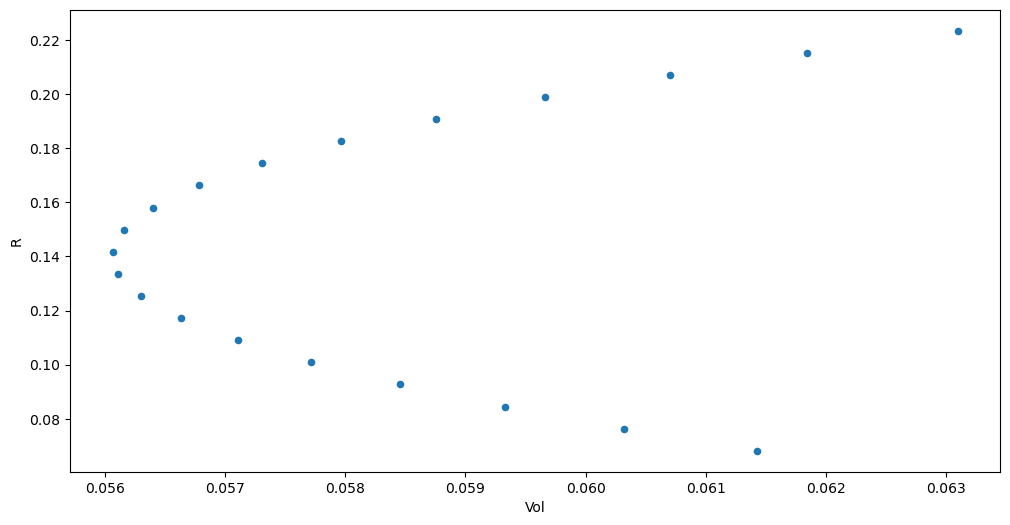

In [35]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
ef = pd.DataFrame({"R" : rets, "Vol": vols}) # to package rets/vol into a dataframe 
ef.plot.scatter(x="Vol", y="R", figsize= (12, 6))

<AxesSubplot:xlabel='Volatility'>

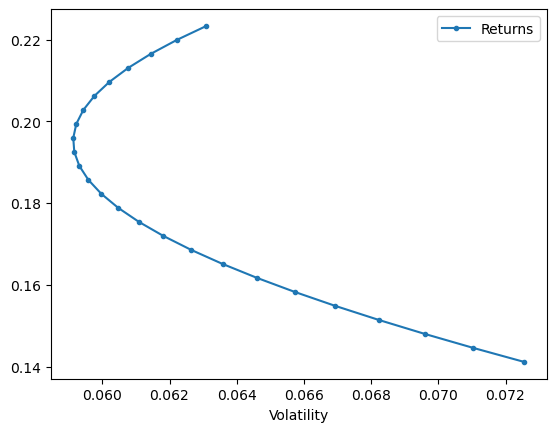

In [41]:
l = ["Fin", "Beer"]
# (# of points, expected return vector, covariance matrix-.loc[assets we want to use]
erk.plot_ef2(25, er[l], cov.loc[l,l])

# 